In [ ]:
#Volcanic rocks classification with Densenet121 and Resnet50
# Written by Ozlem Polat 2020

import keras
import tensorflow as tf
from keras.models import Sequential, Model, load_model
from keras.preprocessing import image
from keras.callbacks import TensorBoard 
from keras.utils.data_utils import get_file
from tensorflow.keras.applications import ResNet50, DenseNet121
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Input, Dropout, Activation, Flatten, BatchNormalization,ZeroPadding2D,concatenate,Lambda,GlobalAveragePooling2D
from keras.optimizers import Adam,SGD,RMSprop, Adadelta
import os
import random
import numpy as np
from skimage import io
import cv2 
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve, confusion_matrix,classification_report 
from scipy import interp
from itertools import cycle
from tqdm import tqdm


Using TensorFlow backend.


In [ ]:
!nvidia-smi

Wed Apr 28 20:55:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.80.02    Driver Version: 450.80.02    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    21W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pwd

/home/jupyter


In [ ]:
!ls "../ychen/COMP551/mini4_data/volkanik_kayac"

andezit  bazalt  dasit	latit  riyolit	trakit


Examine DenseNet121

In [ ]:
Transfer_Model_temp = DenseNet121(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
#Transfer_Model = ResNet50(weights="imagenet", include_top=False, input_shape=input_shape)

add_model_temp = Sequential()

add_model_temp.add(Flatten())
add_model_temp.add(BatchNormalization())
add_model_temp.add(Dense(16, activation='relu'))
add_model_temp.add(Dropout(0.25))
add_model_temp.add(BatchNormalization())
      
add_model_temp.add(Dense(6, activation='softmax'))

model_temp = Model(inputs=Transfer_Model_temp.input, outputs=add_model_temp(Transfer_Model_temp.output))

model_temp.compile(loss="categorical_crossentropy" , optimizer=SGD(lr=0.001, momentum=0.0, nesterov=False), metrics=["accuracy"])

In [ ]:
model_temp.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_6 (ZeroPadding2D (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_6[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
add_model_temp = Sequential()

add_model_temp.add(keras.Input(shape=(7,7,1024)))
add_model_temp.add(Flatten())
add_model_temp.add(BatchNormalization())
add_model_temp.add(Dense(16, activation='relu'))
add_model_temp.add(Dropout(0.25))
add_model_temp.add(BatchNormalization())
      
add_model_temp.add(Dense(6, activation='softmax'))

add_model_temp.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 50176)             0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 50176)             200704    
_________________________________________________________________
dense_22 (Dense)             (None, 16)                802832    
_________________________________________________________________
dropout_11 (Dropout)         (None, 16)                0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 16)                64        
_________________________________________________________________
dense_23 (Dense)             (None, 6)                 102       
Total params: 1,003,702
Trainable params: 903,318
Non-trainable params: 100,384
_______________________________________

In [ ]:
Transfer_Model_temp = DenseNet121(weights="imagenet", include_top=True, input_shape=(224, 224, 3))
#Transfer_Model = ResNet50(weights="imagenet", include_top=False, input_shape=input_shape)

add_model_temp = Sequential()

add_model_temp.add(Flatten())
add_model_temp.add(BatchNormalization())
add_model_temp.add(Dense(16, activation='relu'))
add_model_temp.add(Dropout(0.25))
add_model_temp.add(BatchNormalization())
      
add_model_temp.add(Dense(6, activation='softmax'))

model_temp = Model(inputs=Transfer_Model_temp.input, outputs=add_model_temp(Transfer_Model_temp.output))
model_temp.summary()

33193984/33188688 [==============================] - 2s 0us/step
Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_20 (ZeroPadding2 (None, 230, 230, 3)  0           input_12[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_20[0][0]          
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
__________________________

In [ ]:
# Google Drive

# save_path="/content/drive/MyDrive/COMP551/Mini4/classification_results/"
# print(os.path.isdir(save_path))
# if os.path.isdir(save_path)==True:
#   print("directory exists")
# else:
#   os.mkdir(save_path)
#   print("new directory was created")


False
new directory was created


In [ ]:
# Cloud VM

save_path="../ychen/COMP551/mini4_data/classification_results/ADAM/"
print(os.path.isdir(save_path))
if os.path.isdir(save_path)==True:
  print("directory exists")
else:
  os.mkdir(save_path)
  print("new directory was created")

False
new directory was created


In [ ]:


#rock_classes = ['andesite', 'basalt', 'dacite', 'latite', 'rhyolite', 'trachyte']
rock_classes = ['andezit', 'bazalt', 'dasit', 'latit', 'riyolit', 'trakit']

height=224 
width=224

train_ratio=0.7
test_ratio=0.3
class_number=6

dataset_path= "../ychen/COMP551/mini4_data/volkanik_kayac"
X_train=[]
y_train=[]
X_test=[]
y_test=[]
for cls in rock_classes:
  
  img_path=os.path.join(dataset_path,cls)
  img_files=os.listdir(img_path)
  train_number=round(len(img_files)*train_ratio)
  test_number=round(len(img_files)*test_ratio)
  print("\nTrain data= ",train_number,"\ntest data= ",test_number)
  
  #creating train images
 
  for i in tqdm(range(train_number)):

    a=random.choice(img_files)
    
    img_files=np.delete(img_files,np.argwhere(img_files==a))
    
    img_f=os.path.join(img_path,a)
    img=cv2.imread(img_f)

    img=cv2.resize(img,(height,width))  
    img =img.astype(np.float32) / img.max()  
    img=image.img_to_array(img) 
    img = img.reshape((1,) + img.shape)       
    X_train.append(img) 
    y_train.append(rock_classes.index(cls))
    img_files=np.delete(img_files,np.argwhere(img_files==a))
 
  #creating test images
  for j in tqdm(img_files):
        
    v=os.path.join(img_path,j)
    
    img=cv2.imread(v)

    img=cv2.resize(img,(height,width))  
    img =img.astype(np.float32) / img.max()  
    img=image.img_to_array(img) 
    img = img.reshape((1,) + img.shape)       
    X_test.append(img) 
    y_test.append(rock_classes.index(cls))


 28%|██▊       | 39/140 [00:00<00:00, 385.47it/s]


Train data=  140 
test data=  60


 31%|███▏      | 44/140 [00:00<00:00, 433.97it/s]


Train data=  140 
test data=  60


 34%|███▎      | 47/140 [00:00<00:00, 460.71it/s]


Train data=  140 
test data=  60


 34%|███▍      | 48/140 [00:00<00:00, 472.09it/s]


Train data=  140 
test data=  60


 34%|███▎      | 47/140 [00:00<00:00, 463.06it/s]


Train data=  140 
test data=  60


 32%|███▏      | 45/140 [00:00<00:00, 449.83it/s]


Train data=  140 
test data=  60


100%|██████████| 60/60 [00:00<00:00, 473.10it/s]


In [ ]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

840 840
360 360


In [ ]:
def make_report(ii=0):
    matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
    print(matrix)
    cr = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), target_names=rock_classes)
    cm = np.array2string(matrix)
    f = open(os.path.join(save_path,"report_"+str(ii)+".txt"), 'w')
    f.write('Volcanic Rock \nClassification Report\n\n{}\n\nConfusion Matrix\n\n{}\n'.format(cr, cm))
    f.close()


In [ ]:
def plot_roc(ii=0):

    # Plot linewidth.
    lw = 2
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(class_number):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(class_number)]))

    # interpolate all ROC curves 
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(class_number):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # compute AUC
    mean_tpr /= class_number

    # Plot all ROC curves
    plt.close("all")
    all_plt=plt.figure(1)

    colors = cycle(["blue","red", "purple", "gray", "pink", "brown"])
    for i, color in zip(range(class_number), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='{0} (area = {1:0.3f})'
                 ''.format(rock_classes[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curves of volcanic rock classes')
    plt.legend(loc="lower right")
    plt.show
    all_plt.savefig(save_path+"all_auc_"+str(ii)+".jpg",dpi=150)


In [ ]:
X_train=np.array(X_train,dtype=np.float32)
X_train = X_train.reshape(X_train.shape[0], height, width, 3)

X_test=np.array(X_test,dtype=np.float32)
X_test = X_test.reshape(X_test.shape[0], height, width, 3)

y_train = np.array(y_train, dtype=np.float32)
y_train = keras.utils.to_categorical(y_train, class_number)

y_test = np.array(y_test, dtype=np.float32)
y_test = keras.utils.to_categorical(y_test, class_number)


DenseNet121 with Adadelta optimizer

29089792/29084464 [==============================] - 1s 0us/step
Epoch 1/50
53/53 [==============================] - 40s 227ms/step - loss: 1.0385 - accuracy: 0.6702
Epoch 2/50
53/53 [==============================] - 10s 181ms/step - loss: 0.4491 - accuracy: 0.9050
Epoch 3/50
53/53 [==============================] - 10s 181ms/step - loss: 0.3398 - accuracy: 0.9482
Epoch 4/50
53/53 [==============================] - 10s 182ms/step - loss: 0.4090 - accuracy: 0.9040
Epoch 5/50
53/53 [==============================] - 10s 183ms/step - loss: 0.4069 - accuracy: 0.8810
Epoch 6/50
53/53 [==============================] - 10s 184ms/step - loss: 0.2634 - accuracy: 0.9470
Epoch 7/50
53/53 [==============================] - 10s 185ms/step - loss: 0.3445 - accuracy: 0.8903
Epoch 8/50
53/53 [==============================] - 10s 186ms/step - loss: 0.2285 - accuracy: 0.9496
Epoch 9/50
53/53 [==============================] - 10s 186ms/step - loss: 0.2458 - accuracy: 0.9195
Epoch 10/50
53/53 [=======

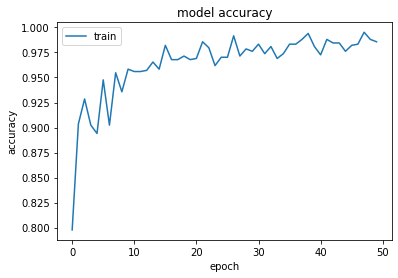

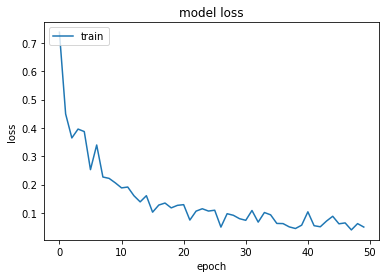

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[15 45  0  0  0  0]
 [ 0 60  0  0  0  0]
 [ 0  5 55  0  0  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0 60  0]
 [ 5 23  1  1  0 30]]
Epoch 1/50
53/53 [==============================] - 20s 191ms/step - loss: 1.1452 - accuracy: 0.6262
Epoch 2/50
53/53 [==============================] - 10s 191ms/step - loss: 0.5189 - accuracy: 0.8605
Epoch 3/50
53/53 [==============================] - 10s 192ms/step - loss: 0.4837 - accuracy: 0.8678
Epoch 4/50
53/53 [==============================] - 10s 192ms/step - loss: 0.3671 - accuracy: 0.9330
Epoch 5/50
53/53 [==============================] - 10s 192ms/step - loss: 0.5271 - accuracy: 0.8434
Epoch 6/50
53/53 [==============================] - 10s 193ms/step - loss: 0.3363 - accuracy: 0.9267
Epoch 7/50
53/53 [==============================] - 10s 193ms/step - loss: 0.2736 - accuracy: 0.9287
Epoch 8/50
53/53 [==============================] - 10s 193ms/step - loss: 0.2024 - accuracy: 0.9667
Epoch 9/50
53/53 [==============================] - 10s 193ms/ste

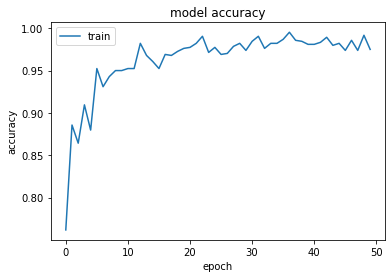

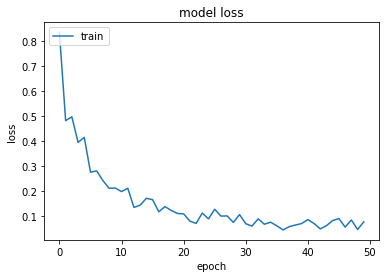

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[57  2  0  1  0  0]
 [ 0 60  0  0  0  0]
 [ 0  0 58  0  2  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0 60  0]
 [ 0  0  0  0  0 60]]
Epoch 1/50
53/53 [==============================] - 20s 191ms/step - loss: 1.1462 - accuracy: 0.5764
Epoch 2/50
53/53 [==============================] - 10s 191ms/step - loss: 0.5143 - accuracy: 0.8743
Epoch 3/50
53/53 [==============================] - 10s 192ms/step - loss: 0.4846 - accuracy: 0.9002
Epoch 4/50
53/53 [==============================] - 10s 192ms/step - loss: 0.3190 - accuracy: 0.9309
Epoch 5/50
53/53 [==============================] - 10s 192ms/step - loss: 0.3037 - accuracy: 0.9287
Epoch 6/50
53/53 [==============================] - 10s 192ms/step - loss: 0.3672 - accuracy: 0.8911
Epoch 7/50
53/53 [==============================] - 10s 193ms/step - loss: 0.2764 - accuracy: 0.9363
Epoch 8/50
53/53 [==============================] - 10s 193ms/step - loss: 0.2060 - accuracy: 0.9612
Epoch 9/50
53/53 [==============================] - 10s 193ms/ste

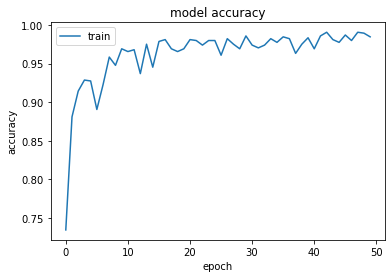

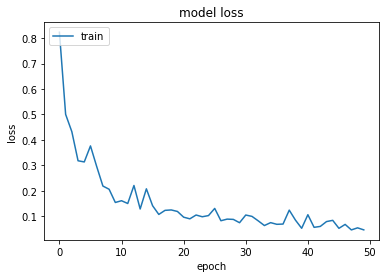

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[60  0  0  0  0  0]
 [ 5 55  0  0  0  0]
 [52  0  7  0  1  0]
 [ 0  0  0 60  0  0]
 [ 3  0  0  0 57  0]
 [10  0  0  0  0 50]]
Epoch 1/50
53/53 [==============================] - 20s 191ms/step - loss: 1.2491 - accuracy: 0.5876
Epoch 2/50
53/53 [==============================] - 10s 191ms/step - loss: 0.5184 - accuracy: 0.8897
Epoch 3/50
53/53 [==============================] - 10s 192ms/step - loss: 0.4361 - accuracy: 0.9139
Epoch 4/50
53/53 [==============================] - 10s 192ms/step - loss: 0.3921 - accuracy: 0.9041
Epoch 5/50
53/53 [==============================] - 10s 192ms/step - loss: 0.3488 - accuracy: 0.9326
Epoch 6/50
53/53 [==============================] - 10s 192ms/step - loss: 0.4007 - accuracy: 0.8997
Epoch 7/50
53/53 [==============================] - 10s 192ms/step - loss: 0.3648 - accuracy: 0.9032
Epoch 8/50
53/53 [==============================] - 10s 193ms/step - loss: 0.2412 - accuracy: 0.9555
Epoch 9/50
53/53 [==============================] - 10s 193ms/ste

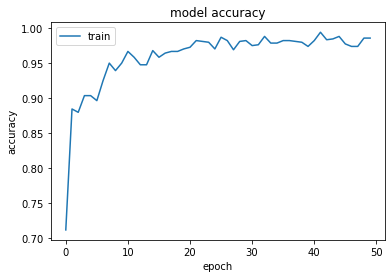

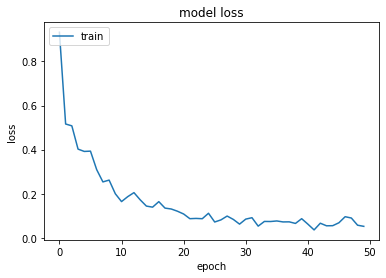

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[60  0  0  0  0  0]
 [ 0 60  0  0  0  0]
 [ 4  0 56  0  0  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0 59  1]
 [ 0  0  0  1  0 59]]
Epoch 1/50
53/53 [==============================] - 21s 191ms/step - loss: 0.9476 - accuracy: 0.6944
Epoch 2/50
53/53 [==============================] - 10s 191ms/step - loss: 0.4077 - accuracy: 0.9370
Epoch 3/50
53/53 [==============================] - 10s 192ms/step - loss: 0.4658 - accuracy: 0.8736
Epoch 4/50
53/53 [==============================] - 10s 192ms/step - loss: 0.4165 - accuracy: 0.8947
Epoch 5/50
53/53 [==============================] - 10s 192ms/step - loss: 0.2855 - accuracy: 0.9324
Epoch 6/50
53/53 [==============================] - 10s 192ms/step - loss: 0.2595 - accuracy: 0.9342
Epoch 7/50
53/53 [==============================] - 10s 192ms/step - loss: 0.2255 - accuracy: 0.9444
Epoch 8/50
53/53 [==============================] - 10s 192ms/step - loss: 0.2531 - accuracy: 0.9169
Epoch 9/50
53/53 [==============================] - 10s 192ms/ste

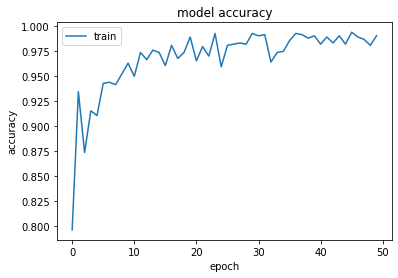

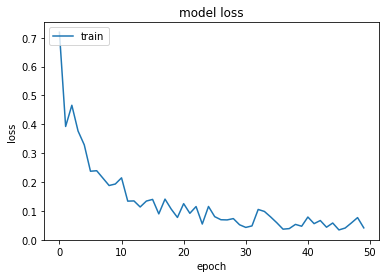

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[60  0  0  0  0  0]
 [ 0 60  0  0  0  0]
 [ 0  0 59  0  1  0]
 [ 0  0  0 59  0  1]
 [ 0  0  0  0 60  0]
 [ 0  0  0  0  0 60]]
Epoch 1/50
53/53 [==============================] - 19s 193ms/step - loss: 1.1484 - accuracy: 0.6188
Epoch 2/50
53/53 [==============================] - 10s 196ms/step - loss: 0.4487 - accuracy: 0.9076
Epoch 3/50
53/53 [==============================] - 11s 199ms/step - loss: 0.4231 - accuracy: 0.8891
Epoch 4/50
53/53 [==============================] - 10s 197ms/step - loss: 0.5243 - accuracy: 0.8675
Epoch 5/50
53/53 [==============================] - 10s 195ms/step - loss: 0.3310 - accuracy: 0.9068
Epoch 6/50
53/53 [==============================] - 10s 194ms/step - loss: 0.4153 - accuracy: 0.8974
Epoch 7/50
53/53 [==============================] - 10s 193ms/step - loss: 0.3439 - accuracy: 0.9082
Epoch 8/50
53/53 [==============================] - 10s 193ms/step - loss: 0.2453 - accuracy: 0.9409
Epoch 9/50
53/53 [==============================] - 10s 193ms/ste

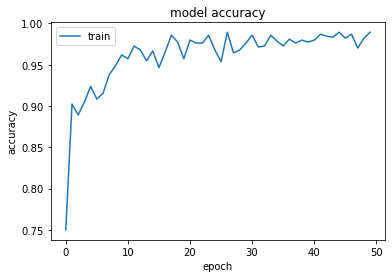

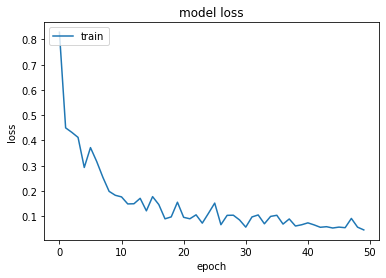

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[60  0  0  0  0  0]
 [ 0 60  0  0  0  0]
 [ 0  0 60  0  0  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0 60  0]
 [ 0  0  5  0  0 55]]
Epoch 1/50
53/53 [==============================] - 20s 193ms/step - loss: 1.1234 - accuracy: 0.6206
Epoch 2/50
53/53 [==============================] - 10s 196ms/step - loss: 0.4332 - accuracy: 0.8975
Epoch 3/50
53/53 [==============================] - 11s 200ms/step - loss: 0.4342 - accuracy: 0.8792
Epoch 4/50
53/53 [==============================] - 10s 198ms/step - loss: 0.4309 - accuracy: 0.8620
Epoch 5/50
53/53 [==============================] - 10s 196ms/step - loss: 0.3329 - accuracy: 0.9170
Epoch 6/50
53/53 [==============================] - 10s 194ms/step - loss: 0.2803 - accuracy: 0.9337
Epoch 7/50
53/53 [==============================] - 10s 193ms/step - loss: 0.2523 - accuracy: 0.9235
Epoch 8/50
53/53 [==============================] - 10s 194ms/step - loss: 0.2415 - accuracy: 0.9294
Epoch 9/50
53/53 [==============================] - 10s 194ms/ste

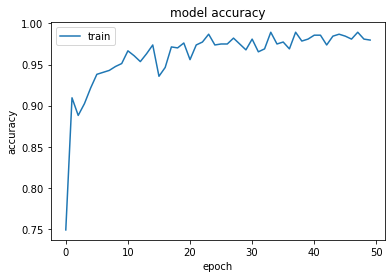

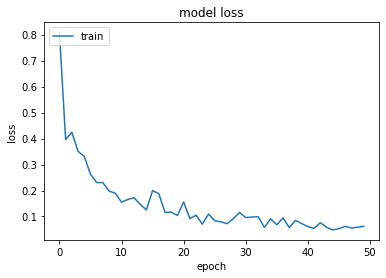

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[60  0  0  0  0  0]
 [ 0 60  0  0  0  0]
 [ 0  0 59  0  1  0]
 [ 0  0  0 60  0  0]
 [ 3  0  3  0 54  0]
 [ 0  0  0  1  0 59]]
Epoch 1/50
53/53 [==============================] - 21s 194ms/step - loss: 1.1419 - accuracy: 0.5949
Epoch 2/50
53/53 [==============================] - 10s 197ms/step - loss: 0.4781 - accuracy: 0.8627
Epoch 3/50
53/53 [==============================] - 11s 200ms/step - loss: 0.3945 - accuracy: 0.9146
Epoch 4/50
53/53 [==============================] - 10s 198ms/step - loss: 0.3823 - accuracy: 0.9008
Epoch 5/50
53/53 [==============================] - 10s 196ms/step - loss: 0.3638 - accuracy: 0.9076
Epoch 6/50
53/53 [==============================] - 10s 195ms/step - loss: 0.3454 - accuracy: 0.9105
Epoch 7/50
53/53 [==============================] - 10s 194ms/step - loss: 0.2579 - accuracy: 0.9429
Epoch 8/50
53/53 [==============================] - 10s 194ms/step - loss: 0.3157 - accuracy: 0.9180
Epoch 9/50
53/53 [==============================] - 10s 194ms/ste

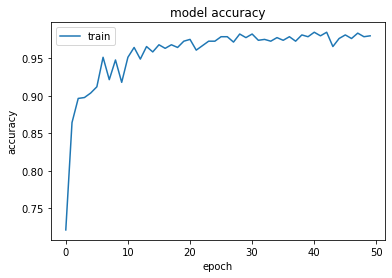

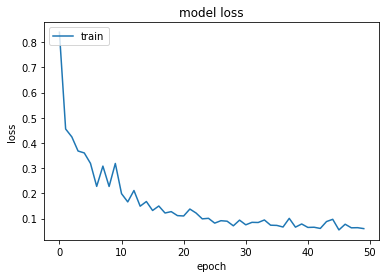

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[60  0  0  0  0  0]
 [ 0 60  0  0  0  0]
 [ 1  4 53  0  2  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0 60  0]
 [ 0  0  0  0  1 59]]
Epoch 1/50
53/53 [==============================] - 20s 194ms/step - loss: 1.1425 - accuracy: 0.5777
Epoch 2/50
53/53 [==============================] - 10s 197ms/step - loss: 0.4478 - accuracy: 0.9096
Epoch 3/50
53/53 [==============================] - 11s 200ms/step - loss: 0.4374 - accuracy: 0.8728
Epoch 4/50
53/53 [==============================] - 10s 197ms/step - loss: 0.4566 - accuracy: 0.8716
Epoch 5/50
53/53 [==============================] - 10s 195ms/step - loss: 0.3077 - accuracy: 0.9303
Epoch 6/50
53/53 [==============================] - 10s 194ms/step - loss: 0.4351 - accuracy: 0.8688
Epoch 7/50
53/53 [==============================] - 10s 193ms/step - loss: 0.2965 - accuracy: 0.9373
Epoch 8/50
53/53 [==============================] - 10s 193ms/step - loss: 0.2192 - accuracy: 0.9641
Epoch 9/50
53/53 [==============================] - 10s 194ms/ste

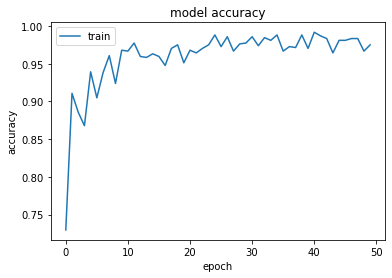

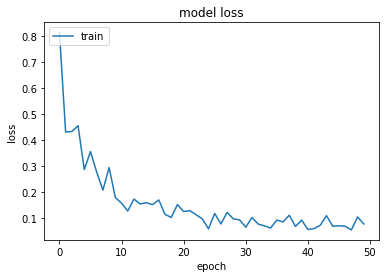

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[60  0  0  0  0  0]
 [ 0 60  0  0  0  0]
 [ 0  0 59  0  1  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0 60  0]
 [ 0  0  1  0  1 58]]
Epoch 1/50
53/53 [==============================] - 20s 193ms/step - loss: 1.2171 - accuracy: 0.5972
Epoch 2/50
53/53 [==============================] - 10s 196ms/step - loss: 0.4412 - accuracy: 0.8930
Epoch 3/50
53/53 [==============================] - 11s 199ms/step - loss: 0.3774 - accuracy: 0.9120
Epoch 4/50
53/53 [==============================] - 10s 197ms/step - loss: 0.5313 - accuracy: 0.8450
Epoch 5/50
53/53 [==============================] - 10s 196ms/step - loss: 0.2614 - accuracy: 0.9417
Epoch 6/50
53/53 [==============================] - 10s 195ms/step - loss: 0.3201 - accuracy: 0.9196
Epoch 7/50
53/53 [==============================] - 10s 193ms/step - loss: 0.3052 - accuracy: 0.9232
Epoch 8/50
53/53 [==============================] - 10s 193ms/step - loss: 0.2557 - accuracy: 0.9430
Epoch 9/50
53/53 [==============================] - 10s 193ms/ste

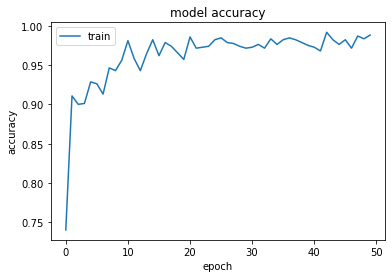

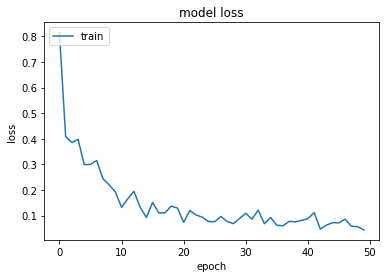

[[60  0  0  0  0  0]
 [ 8 51  0  0  1  0]
 [10  0 47  0  3  0]
 [ 0  0  0 60  0  0]
 [ 2  0  0  0 58  0]
 [15  0  0  1  0 44]]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


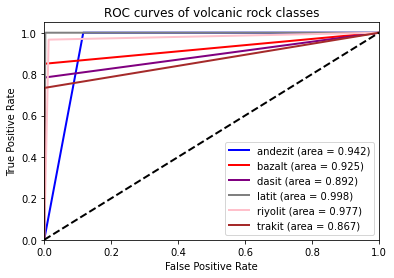

In [ ]:
#Training Process

EPOCHS=50
BATCH_SIZE=16
x_fold=10
optimizer=Adadelta(lr=1.0, rho=0.95, epsilon=1e-07, decay=0.0)
#optimizer=Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
#optimizer=SGD(lr=0.001, momentum=0.0, nesterov=False)
#optimizer=RMSprop(lr=0.0001, rho=0.9)

metric="accuracy" 
loss="categorical_crossentropy" 
model_checkpoint_callback=keras.callbacks.ModelCheckpoint("bestmodel.h5",save_best_only=True,save_weights_only=True,)
callbacks=[model_checkpoint_callback]

for i in range(x_fold):
  input_shape=(height, width, 3)
  Transfer_Model = DenseNet121(weights="imagenet", include_top=False, input_shape=input_shape)
  #Transfer_Model = ResNet50(weights="imagenet", include_top=False, input_shape=input_shape)
  
  add_model = Sequential()

  add_model.add(Flatten())
  add_model.add(BatchNormalization())
  add_model.add(Dense(16, activation='relu'))
  add_model.add(Dropout(0.25))
  add_model.add(BatchNormalization())
        
  add_model.add(Dense(class_number, activation='softmax'))
  #add_model.add(Tranfer_Model.output)

  model = Model(inputs=Transfer_Model.input, outputs=add_model(Transfer_Model.output))

  model.compile(loss=loss, optimizer=optimizer, metrics=[metric])
  history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
  #predictions
  y_pred= model.predict(X_test)
  y_pred=np.argmax(y_pred,axis=1).astype(np.float32)
  y_pred = keras.utils.to_categorical(y_pred, class_number)

  train_score = model.evaluate(X_train, y_train)
  test_score = model.evaluate(X_test, y_test)
  print(train_score)
  print(test_score)

  #Plot accuracy 
  plt.close("all")
  plt.plot(history.history['accuracy'])
  #plt.plot(history.history['val_accuracy'])  
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  plt.savefig(os.path.join(save_path,"acc_"+str(i)+".jpg"),dpi=150)
  #Plot loss
  plt.close("all")
  plt.plot(history.history['loss'])
  #plt.plot(history.history['val_accuracy'])
      
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  plt.savefig(os.path.join(save_path,"loss_"+str(i)+".jpg"),dpi=150)
  #Plot ROC
  plot_roc(i)
  make_report(i)

In [ ]:
[0.5520955920219421, 0.8166666626930237]
[0.7257620692253113, 0.7777777910232544]

[0.0023387083783745766, 1.0]
[0.04192785173654556, 0.9861111044883728]

[0.6403874754905701, 0.8464285731315613]
[0.9032281637191772, 0.8027777671813965]

[0.0024076607078313828, 1.0]
[0.056128788739442825, 0.9833333492279053]

[0.0023882591631263494, 1.0]
[0.029403578490018845, 0.9944444298744202]

[0.004068535286933184, 1.0]
[0.03956257924437523, 0.9861111044883728]

[0.013838818296790123, 0.9952380657196045]
[0.06845000386238098, 0.9777777791023254]




DenseNet121 with ADAM optimizer

In [ ]:
DenseNet121_ADAM_history = {}

Epoch 1/50
53/53 [==============================] - 20s 196ms/step - loss: 1.5966 - accuracy: 0.4210
Epoch 2/50
53/53 [==============================] - 10s 198ms/step - loss: 0.6641 - accuracy: 0.8364
Epoch 3/50
53/53 [==============================] - 10s 195ms/step - loss: 0.5327 - accuracy: 0.9313
Epoch 4/50
53/53 [==============================] - 10s 193ms/step - loss: 0.4494 - accuracy: 0.9424
Epoch 5/50
53/53 [==============================] - 10s 191ms/step - loss: 0.4041 - accuracy: 0.9589
Epoch 6/50
53/53 [==============================] - 10s 191ms/step - loss: 0.3580 - accuracy: 0.9714
Epoch 7/50
53/53 [==============================] - 10s 192ms/step - loss: 0.3441 - accuracy: 0.9705
Epoch 8/50
53/53 [==============================] - 10s 192ms/step - loss: 0.3345 - accuracy: 0.9665
Epoch 9/50
53/53 [==============================] - 10s 193ms/step - loss: 0.3030 - accuracy: 0.9753
Epoch 10/50
53/53 [==============================] - 10s 194ms/step - loss: 0.3068 - accura

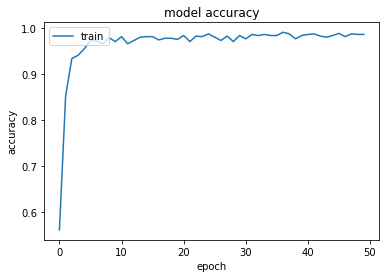

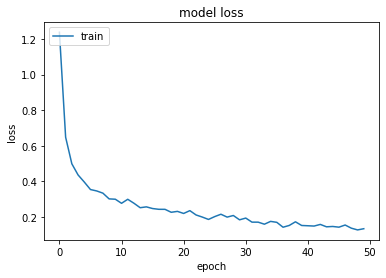

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[60  0  0  0  0  0]
 [ 0 60  0  0  0  0]
 [ 0  0 60  0  0  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0 60  0]
 [ 0  0  0  0  0 60]]
Epoch 1/50
53/53 [==============================] - 21s 191ms/step - loss: 1.2533 - accuracy: 0.5544
Epoch 2/50
53/53 [==============================] - 10s 194ms/step - loss: 0.4103 - accuracy: 0.9311
Epoch 3/50
53/53 [==============================] - 10s 197ms/step - loss: 0.3841 - accuracy: 0.9285
Epoch 4/50
53/53 [==============================] - 10s 196ms/step - loss: 0.3039 - accuracy: 0.9633
Epoch 5/50
53/53 [==============================] - 10s 195ms/step - loss: 0.2889 - accuracy: 0.9567
Epoch 6/50
53/53 [==============================] - 10s 193ms/step - loss: 0.2335 - accuracy: 0.9857
Epoch 7/50
53/53 [==============================] - 10s 192ms/step - loss: 0.2359 - accuracy: 0.9589
Epoch 8/50
53/53 [==============================] - 10s 192ms/step - loss: 0.2227 - accuracy: 0.9752
Epoch 9/50
53/53 [==============================] - 10s 192ms/ste

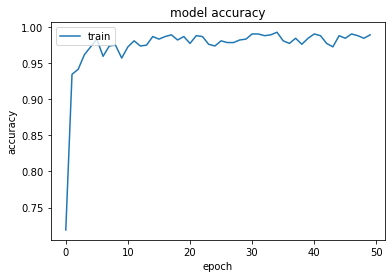

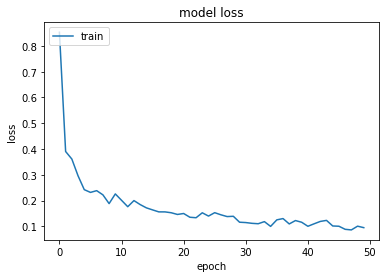

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[60  0  0  0  0  0]
 [ 0 60  0  0  0  0]
 [ 0  0 59  0  1  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0 60  0]
 [ 0  0  0  0  0 60]]
Epoch 1/50
53/53 [==============================] - 19s 190ms/step - loss: 1.3337 - accuracy: 0.5512
Epoch 2/50
53/53 [==============================] - 10s 194ms/step - loss: 0.4626 - accuracy: 0.9040
Epoch 3/50
53/53 [==============================] - 10s 196ms/step - loss: 0.3603 - accuracy: 0.9339
Epoch 4/50
53/53 [==============================] - 10s 194ms/step - loss: 0.3155 - accuracy: 0.9612
Epoch 5/50
53/53 [==============================] - 10s 193ms/step - loss: 0.3499 - accuracy: 0.9331
Epoch 6/50
53/53 [==============================] - 10s 192ms/step - loss: 0.3242 - accuracy: 0.9286
Epoch 7/50
53/53 [==============================] - 10s 191ms/step - loss: 0.2730 - accuracy: 0.9627
Epoch 8/50
53/53 [==============================] - 10s 191ms/step - loss: 0.2192 - accuracy: 0.9879
Epoch 9/50
53/53 [==============================] - 10s 192ms/ste

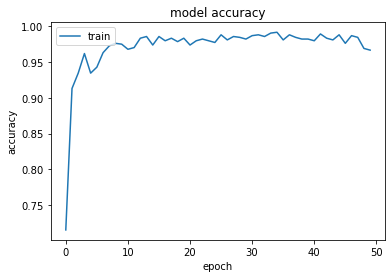

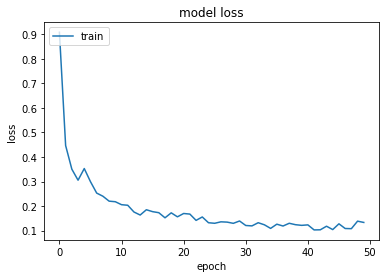

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[60  0  0  0  0  0]
 [ 0 60  0  0  0  0]
 [ 0  0 59  0  1  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0 60  0]
 [ 0  0  0  1  0 59]]
Epoch 1/50
53/53 [==============================] - 21s 191ms/step - loss: 1.1306 - accuracy: 0.5800
Epoch 2/50
53/53 [==============================] - 10s 195ms/step - loss: 0.4194 - accuracy: 0.9395
Epoch 3/50
53/53 [==============================] - 10s 198ms/step - loss: 0.3203 - accuracy: 0.9718
Epoch 4/50
53/53 [==============================] - 10s 196ms/step - loss: 0.3152 - accuracy: 0.9654
Epoch 5/50
53/53 [==============================] - 10s 194ms/step - loss: 0.2861 - accuracy: 0.9711
Epoch 6/50
53/53 [==============================] - 10s 193ms/step - loss: 0.2673 - accuracy: 0.9602
Epoch 7/50
53/53 [==============================] - 10s 193ms/step - loss: 0.2444 - accuracy: 0.9725
Epoch 8/50
53/53 [==============================] - 10s 191ms/step - loss: 0.2425 - accuracy: 0.9731
Epoch 9/50
53/53 [==============================] - 10s 192ms/ste

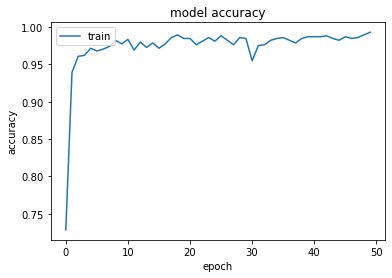

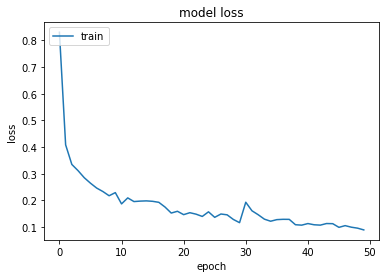

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[60  0  0  0  0  0]
 [ 0 60  0  0  0  0]
 [ 1  0 59  0  0  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0 60  0]
 [ 0  0  1  0  0 59]]
Epoch 1/50
53/53 [==============================] - 20s 191ms/step - loss: 1.1571 - accuracy: 0.5893
Epoch 2/50
53/53 [==============================] - 10s 194ms/step - loss: 0.5929 - accuracy: 0.8686
Epoch 3/50
53/53 [==============================] - 10s 196ms/step - loss: 0.4356 - accuracy: 0.9188
Epoch 4/50
53/53 [==============================] - 10s 194ms/step - loss: 0.3892 - accuracy: 0.9421
Epoch 5/50
53/53 [==============================] - 10s 193ms/step - loss: 0.3464 - accuracy: 0.9654
Epoch 6/50
53/53 [==============================] - 10s 192ms/step - loss: 0.3115 - accuracy: 0.9672
Epoch 7/50
53/53 [==============================] - 10s 192ms/step - loss: 0.3367 - accuracy: 0.9395
Epoch 8/50
53/53 [==============================] - 10s 191ms/step - loss: 0.3310 - accuracy: 0.9466
Epoch 9/50
53/53 [==============================] - 10s 192ms/ste

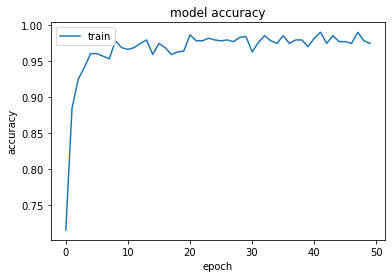

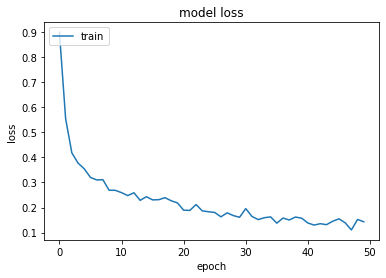

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[60  0  0  0  0  0]
 [ 0 60  0  0  0  0]
 [ 0  0 56  0  0  4]
 [ 0  0  0 60  0  0]
 [ 0  0  3  1 56  0]
 [ 0  0  0  1  0 59]]
Epoch 1/50
53/53 [==============================] - 21s 192ms/step - loss: 1.4425 - accuracy: 0.5039
Epoch 2/50
53/53 [==============================] - 10s 195ms/step - loss: 0.4775 - accuracy: 0.9232
Epoch 3/50
53/53 [==============================] - 11s 199ms/step - loss: 0.4376 - accuracy: 0.9318
Epoch 4/50
53/53 [==============================] - 10s 197ms/step - loss: 0.3973 - accuracy: 0.9429
Epoch 5/50
53/53 [==============================] - 10s 195ms/step - loss: 0.3664 - accuracy: 0.9463
Epoch 6/50
53/53 [==============================] - 10s 193ms/step - loss: 0.3189 - accuracy: 0.9599
Epoch 7/50
53/53 [==============================] - 10s 192ms/step - loss: 0.3444 - accuracy: 0.9467
Epoch 8/50
53/53 [==============================] - 10s 192ms/step - loss: 0.3135 - accuracy: 0.9653
Epoch 9/50
53/53 [==============================] - 10s 192ms/ste

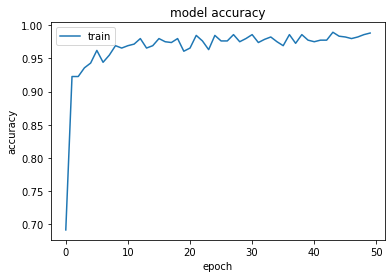

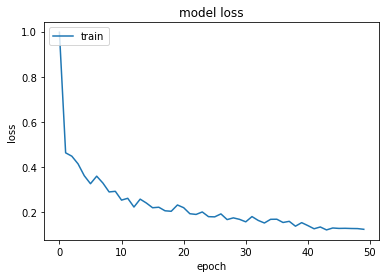

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[60  0  0  0  0  0]
 [ 0 60  0  0  0  0]
 [ 0  0 60  0  0  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0 60  0]
 [ 0  0  0  1  0 59]]
Epoch 1/50
53/53 [==============================] - 21s 192ms/step - loss: 1.2272 - accuracy: 0.5542
Epoch 2/50
53/53 [==============================] - 10s 196ms/step - loss: 0.4661 - accuracy: 0.8995
Epoch 3/50
53/53 [==============================] - 11s 199ms/step - loss: 0.3738 - accuracy: 0.9349
Epoch 4/50
53/53 [==============================] - 10s 198ms/step - loss: 0.3570 - accuracy: 0.9390
Epoch 5/50
53/53 [==============================] - 10s 195ms/step - loss: 0.2765 - accuracy: 0.9723
Epoch 6/50
53/53 [==============================] - 10s 194ms/step - loss: 0.2653 - accuracy: 0.9608
Epoch 7/50
53/53 [==============================] - 10s 193ms/step - loss: 0.2659 - accuracy: 0.9662
Epoch 8/50
53/53 [==============================] - 10s 193ms/step - loss: 0.2720 - accuracy: 0.9494
Epoch 9/50
53/53 [==============================] - 10s 192ms/ste

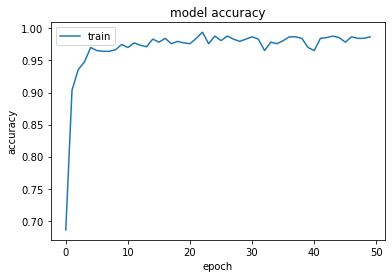

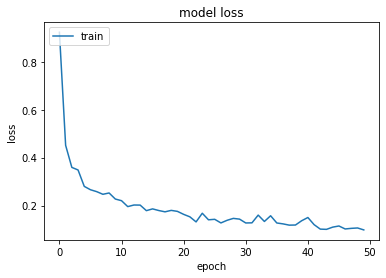

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[60  0  0  0  0  0]
 [ 0 60  0  0  0  0]
 [ 0  0 59  0  1  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0 60  0]
 [ 0  0  0  0  1 59]]
Epoch 1/50
53/53 [==============================] - 20s 191ms/step - loss: 1.3218 - accuracy: 0.5374
Epoch 2/50
53/53 [==============================] - 10s 194ms/step - loss: 0.5305 - accuracy: 0.9067
Epoch 3/50
53/53 [==============================] - 10s 197ms/step - loss: 0.4267 - accuracy: 0.9326
Epoch 4/50
53/53 [==============================] - 10s 195ms/step - loss: 0.3679 - accuracy: 0.9564
Epoch 5/50
53/53 [==============================] - 10s 194ms/step - loss: 0.3545 - accuracy: 0.9321
Epoch 6/50
53/53 [==============================] - 10s 192ms/step - loss: 0.3186 - accuracy: 0.9632
Epoch 7/50
53/53 [==============================] - 10s 191ms/step - loss: 0.3026 - accuracy: 0.9606
Epoch 8/50
53/53 [==============================] - 10s 191ms/step - loss: 0.3557 - accuracy: 0.9418
Epoch 9/50
53/53 [==============================] - 10s 191ms/ste

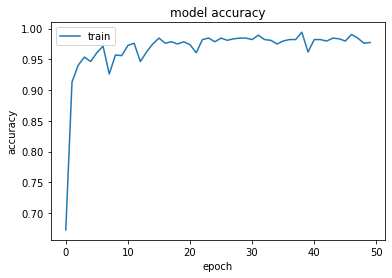

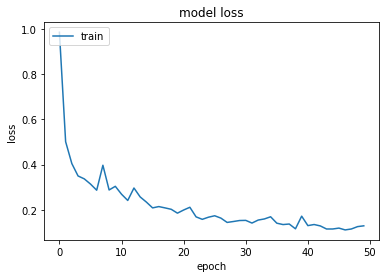

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[60  0  0  0  0  0]
 [ 0 60  0  0  0  0]
 [ 4  0 56  0  0  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0 60  0]
 [ 0  0  0  0  0 60]]
Epoch 1/50
53/53 [==============================] - 19s 191ms/step - loss: 1.1786 - accuracy: 0.5496
Epoch 2/50
53/53 [==============================] - 10s 194ms/step - loss: 0.5390 - accuracy: 0.8761
Epoch 3/50
53/53 [==============================] - 10s 196ms/step - loss: 0.3917 - accuracy: 0.9315
Epoch 4/50
53/53 [==============================] - 10s 194ms/step - loss: 0.3550 - accuracy: 0.9537
Epoch 5/50
53/53 [==============================] - 10s 193ms/step - loss: 0.3387 - accuracy: 0.9530
Epoch 6/50
53/53 [==============================] - 10s 192ms/step - loss: 0.2892 - accuracy: 0.9575
Epoch 7/50
53/53 [==============================] - 10s 191ms/step - loss: 0.2739 - accuracy: 0.9630
Epoch 8/50
53/53 [==============================] - 10s 191ms/step - loss: 0.2949 - accuracy: 0.9637
Epoch 9/50
53/53 [==============================] - 10s 191ms/ste

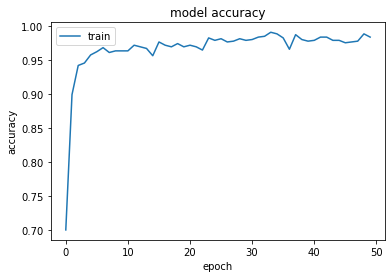

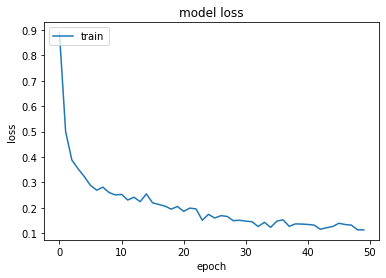

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[60  0  0  0  0  0]
 [ 0 60  0  0  0  0]
 [ 0  0 59  0  1  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0 60  0]
 [ 0  0  0  1  0 59]]
Epoch 1/50
53/53 [==============================] - 19s 191ms/step - loss: 1.1647 - accuracy: 0.5797
Epoch 2/50
53/53 [==============================] - 10s 195ms/step - loss: 0.4352 - accuracy: 0.9135
Epoch 3/50
53/53 [==============================] - 10s 197ms/step - loss: 0.3780 - accuracy: 0.9444
Epoch 4/50
53/53 [==============================] - 10s 196ms/step - loss: 0.3436 - accuracy: 0.9345
Epoch 5/50
53/53 [==============================] - 10s 194ms/step - loss: 0.3026 - accuracy: 0.9699
Epoch 6/50
53/53 [==============================] - 10s 193ms/step - loss: 0.3140 - accuracy: 0.9551
Epoch 7/50
53/53 [==============================] - 10s 192ms/step - loss: 0.2831 - accuracy: 0.9701
Epoch 8/50
53/53 [==============================] - 10s 191ms/step - loss: 0.2608 - accuracy: 0.9713
Epoch 9/50
53/53 [==============================] - 10s 192ms/ste

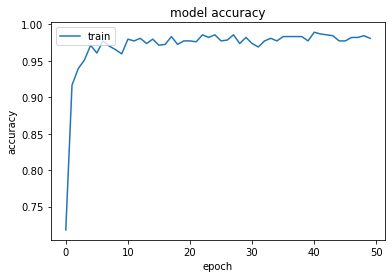

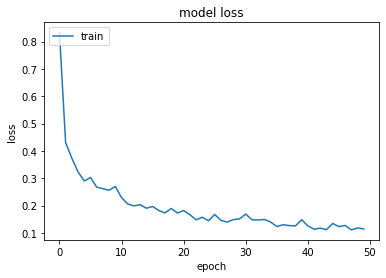

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[60  0  0  0  0  0]
 [ 0 60  0  0  0  0]
 [ 0  0 59  0  1  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0 60  0]
 [ 0  0  0  0  0 60]]


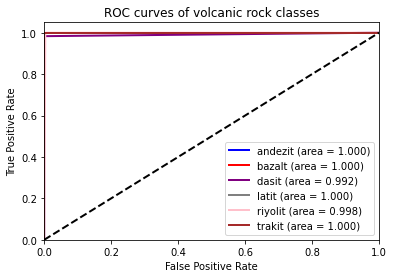

In [ ]:
#Training Process

EPOCHS=50
BATCH_SIZE=16
x_fold=10
#optimizer=Adadelta(lr=1.0, rho=0.95, epsilon=1e-07, decay=0.0)
optimizer=Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
#optimizer=SGD(lr=0.001, momentum=0.0, nesterov=False)
#optimizer=RMSprop(lr=0.0001, rho=0.9)

metric="accuracy" 
loss="categorical_crossentropy" 
model_checkpoint_callback=keras.callbacks.ModelCheckpoint("bestmodel.h5",save_best_only=True,save_weights_only=True,)
callbacks=[model_checkpoint_callback]

for i in range(x_fold):
  input_shape=(height, width, 3)
  Transfer_Model = DenseNet121(weights="imagenet", include_top=False, input_shape=input_shape)
  #Transfer_Model = ResNet50(weights="imagenet", include_top=False, input_shape=input_shape)
  
  add_model = Sequential()

  add_model.add(Flatten())
  add_model.add(BatchNormalization())
  add_model.add(Dense(16, activation='relu'))
  add_model.add(Dropout(0.25))
  add_model.add(BatchNormalization())
        
  add_model.add(Dense(class_number, activation='softmax'))
  #add_model.add(Tranfer_Model.output)

  model = Model(inputs=Transfer_Model.input, outputs=add_model(Transfer_Model.output))

  model.compile(loss=loss, optimizer=optimizer, metrics=[metric])
  history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
  #predictions
  y_pred= model.predict(X_test)
  y_pred=np.argmax(y_pred,axis=1).astype(np.float32)
  y_pred = keras.utils.to_categorical(y_pred, class_number)

  train_score = model.evaluate(X_train, y_train)
  test_score = model.evaluate(X_test, y_test)
  print(train_score)
  print(test_score)


  DenseNet121_ADAM_history[i] = history.history
  #Plot accuracy 
  plt.close("all")
  plt.plot(history.history['accuracy'])
  #plt.plot(history.history['val_accuracy'])  
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  plt.savefig(os.path.join(save_path,"acc_"+str(i)+".jpg"),dpi=150)
  #Plot loss
  plt.close("all")
  plt.plot(history.history['loss'])
  #plt.plot(history.history['val_accuracy'])
      
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  plt.savefig(os.path.join(save_path,"loss_"+str(i)+".jpg"),dpi=150)
  #Plot ROC
  plot_roc(i)
  make_report(i)

  # 1h28m48s

In [ ]:
print(save_path)

../ychen/COMP551/mini4_data/classification_results/ADAM/


In [ ]:
type(history.history)

dict

In [ ]:
import json

In [ ]:
with open("../ychen/COMP551/mini4_data/classification_results/ADAM/ADAM_history.json", 'w') as adam_f:
  json.dump(DenseNet121_ADAM_history, adam_f)

DenseNet121 with RMSprop optimizer

In [ ]:
save_path="../ychen/COMP551/mini4_data/classification_results/RMSprop/"
print(os.path.isdir(save_path))
if os.path.isdir(save_path)==True:
  print("directory exists")
else:
  os.mkdir(save_path)
  print("new directory was created")

False
new directory was created


In [ ]:
DenseNet121_RMSprop_history = {}

Epoch 1/50
53/53 [==============================] - 28s 204ms/step - loss: 1.4625 - accuracy: 0.4829
Epoch 2/50
53/53 [==============================] - 11s 207ms/step - loss: 0.5739 - accuracy: 0.8449
Epoch 3/50
53/53 [==============================] - 11s 205ms/step - loss: 0.4141 - accuracy: 0.9319
Epoch 4/50
53/53 [==============================] - 11s 204ms/step - loss: 0.3639 - accuracy: 0.9513
Epoch 5/50
53/53 [==============================] - 11s 200ms/step - loss: 0.3553 - accuracy: 0.9516
Epoch 6/50
53/53 [==============================] - 11s 200ms/step - loss: 0.3600 - accuracy: 0.9460
Epoch 7/50
53/53 [==============================] - 11s 201ms/step - loss: 0.3155 - accuracy: 0.9618
Epoch 8/50
53/53 [==============================] - 11s 202ms/step - loss: 0.2775 - accuracy: 0.9684
Epoch 9/50
53/53 [==============================] - 11s 203ms/step - loss: 0.3107 - accuracy: 0.9477
Epoch 10/50
53/53 [==============================] - 11s 204ms/step - loss: 0.2748 - accura

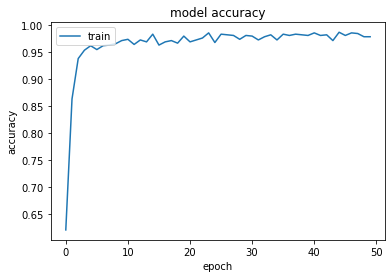

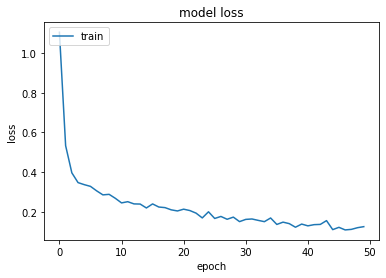

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[60  0  0  0  0  0]
 [ 0 60  0  0  0  0]
 [ 0  0 60  0  0  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0 60  0]
 [ 0  0  0  0  0 60]]
Epoch 1/50
53/53 [==============================] - 28s 201ms/step - loss: 1.4591 - accuracy: 0.4805
Epoch 2/50
53/53 [==============================] - 11s 205ms/step - loss: 0.6126 - accuracy: 0.8506
Epoch 3/50
53/53 [==============================] - 11s 207ms/step - loss: 0.4986 - accuracy: 0.9064
Epoch 4/50
53/53 [==============================] - 11s 206ms/step - loss: 0.3818 - accuracy: 0.9569
Epoch 5/50
53/53 [==============================] - 11s 204ms/step - loss: 0.3846 - accuracy: 0.9575
Epoch 6/50
53/53 [==============================] - 11s 202ms/step - loss: 0.3232 - accuracy: 0.9784
Epoch 7/50
53/53 [==============================] - 11s 202ms/step - loss: 0.3378 - accuracy: 0.9731
Epoch 8/50
53/53 [==============================] - 11s 202ms/step - loss: 0.2709 - accuracy: 0.9804
Epoch 9/50
53/53 [==============================] - 11s 202ms/ste

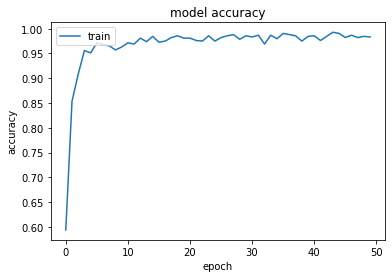

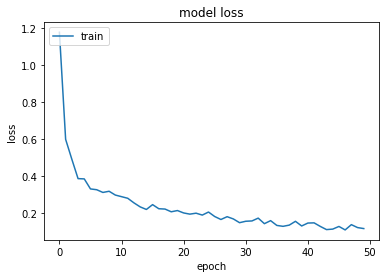

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[60  0  0  0  0  0]
 [ 0 60  0  0  0  0]
 [ 0  0 59  0  1  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0 60  0]
 [ 0  0  0  0  0 60]]
Epoch 1/50
53/53 [==============================] - 29s 201ms/step - loss: 1.4177 - accuracy: 0.4799
Epoch 2/50
53/53 [==============================] - 11s 204ms/step - loss: 0.6148 - accuracy: 0.8586
Epoch 3/50
53/53 [==============================] - 11s 207ms/step - loss: 0.4934 - accuracy: 0.9265
Epoch 4/50
53/53 [==============================] - 11s 207ms/step - loss: 0.4558 - accuracy: 0.9253
Epoch 5/50
53/53 [==============================] - 11s 204ms/step - loss: 0.4192 - accuracy: 0.9513
Epoch 6/50
53/53 [==============================] - 11s 202ms/step - loss: 0.3629 - accuracy: 0.9772
Epoch 7/50
53/53 [==============================] - 11s 201ms/step - loss: 0.3492 - accuracy: 0.9529
Epoch 8/50
53/53 [==============================] - 11s 201ms/step - loss: 0.3609 - accuracy: 0.9608
Epoch 9/50
53/53 [==============================] - 11s 201ms/ste

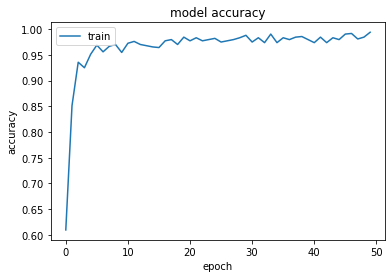

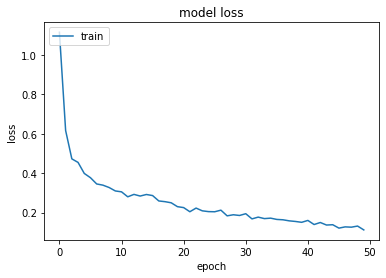

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[60  0  0  0  0  0]
 [ 0 60  0  0  0  0]
 [ 0  0 59  0  1  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0 60  0]
 [ 0  0  0  0  0 60]]
Epoch 1/50
53/53 [==============================] - 29s 201ms/step - loss: 1.4482 - accuracy: 0.4513
Epoch 2/50
53/53 [==============================] - 11s 204ms/step - loss: 0.6234 - accuracy: 0.8873
Epoch 3/50
53/53 [==============================] - 11s 207ms/step - loss: 0.5133 - accuracy: 0.9198
Epoch 4/50
53/53 [==============================] - 11s 206ms/step - loss: 0.4223 - accuracy: 0.9648
Epoch 5/50
53/53 [==============================] - 11s 203ms/step - loss: 0.3806 - accuracy: 0.9704
Epoch 6/50
53/53 [==============================] - 11s 201ms/step - loss: 0.4055 - accuracy: 0.9459
Epoch 7/50
53/53 [==============================] - 11s 201ms/step - loss: 0.3777 - accuracy: 0.9664
Epoch 8/50
53/53 [==============================] - 11s 201ms/step - loss: 0.3636 - accuracy: 0.9750
Epoch 9/50
53/53 [==============================] - 11s 202ms/ste

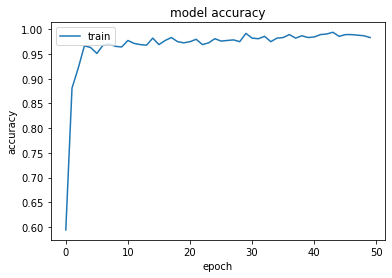

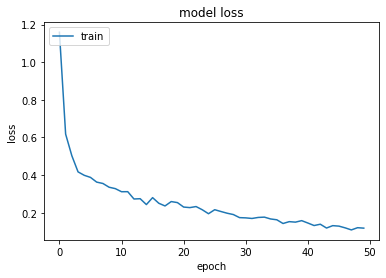

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[60  0  0  0  0  0]
 [ 0 60  0  0  0  0]
 [ 2  0 55  0  3  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0 60  0]
 [ 0  0  0  0  1 59]]
Epoch 1/50
53/53 [==============================] - 27s 200ms/step - loss: 1.3214 - accuracy: 0.5034
Epoch 2/50
53/53 [==============================] - 11s 203ms/step - loss: 0.6172 - accuracy: 0.8387
Epoch 3/50
53/53 [==============================] - 11s 205ms/step - loss: 0.4891 - accuracy: 0.9104
Epoch 4/50
53/53 [==============================] - 11s 204ms/step - loss: 0.4025 - accuracy: 0.9369
Epoch 5/50
53/53 [==============================] - 11s 201ms/step - loss: 0.3901 - accuracy: 0.9184
Epoch 6/50
53/53 [==============================] - 11s 201ms/step - loss: 0.3724 - accuracy: 0.9458
Epoch 7/50
53/53 [==============================] - 11s 200ms/step - loss: 0.3384 - accuracy: 0.9617
Epoch 8/50
53/53 [==============================] - 11s 200ms/step - loss: 0.3355 - accuracy: 0.9463
Epoch 9/50
53/53 [==============================] - 11s 200ms/ste

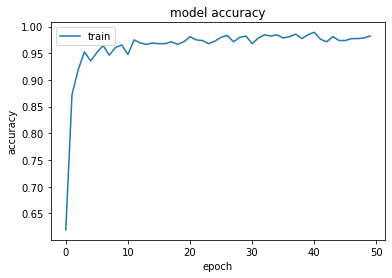

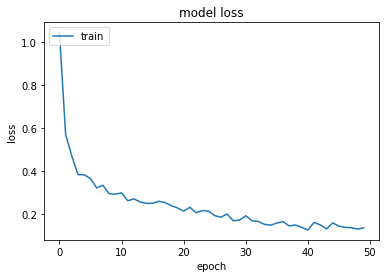

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[60  0  0  0  0  0]
 [ 0 60  0  0  0  0]
 [ 1  0 58  0  1  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0 60  0]
 [ 0  0  1  1  1 57]]
Epoch 1/50
53/53 [==============================] - 29s 200ms/step - loss: 1.3451 - accuracy: 0.4953
Epoch 2/50
53/53 [==============================] - 11s 203ms/step - loss: 0.5751 - accuracy: 0.8714
Epoch 3/50
53/53 [==============================] - 11s 206ms/step - loss: 0.4287 - accuracy: 0.9434
Epoch 4/50
53/53 [==============================] - 11s 204ms/step - loss: 0.4021 - accuracy: 0.9235
Epoch 5/50
53/53 [==============================] - 11s 201ms/step - loss: 0.3480 - accuracy: 0.9648
Epoch 6/50
53/53 [==============================] - 11s 201ms/step - loss: 0.3009 - accuracy: 0.9666
Epoch 7/50
53/53 [==============================] - 11s 200ms/step - loss: 0.2996 - accuracy: 0.9782
Epoch 8/50
53/53 [==============================] - 11s 200ms/step - loss: 0.2899 - accuracy: 0.9520
Epoch 9/50
53/53 [==============================] - 11s 201ms/ste

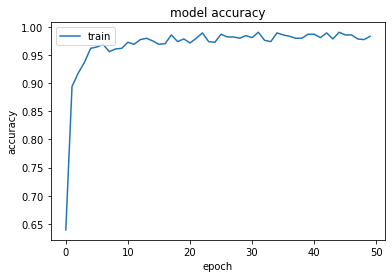

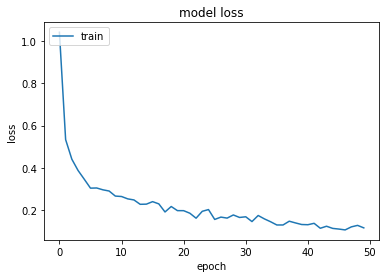

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[60  0  0  0  0  0]
 [ 0 60  0  0  0  0]
 [ 0  0 59  0  1  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0 60  0]
 [ 0  0  1  0  1 58]]
Epoch 1/50
53/53 [==============================] - 28s 201ms/step - loss: 1.3355 - accuracy: 0.4976
Epoch 2/50
53/53 [==============================] - 11s 204ms/step - loss: 0.5123 - accuracy: 0.8986
Epoch 3/50
53/53 [==============================] - 11s 207ms/step - loss: 0.4342 - accuracy: 0.9275
Epoch 4/50
53/53 [==============================] - 11s 206ms/step - loss: 0.3763 - accuracy: 0.9426
Epoch 5/50
53/53 [==============================] - 11s 203ms/step - loss: 0.3391 - accuracy: 0.9532
Epoch 6/50
53/53 [==============================] - 11s 201ms/step - loss: 0.3440 - accuracy: 0.9417
Epoch 7/50
53/53 [==============================] - 11s 201ms/step - loss: 0.3146 - accuracy: 0.9467
Epoch 8/50
53/53 [==============================] - 11s 201ms/step - loss: 0.3172 - accuracy: 0.9496
Epoch 9/50
53/53 [==============================] - 11s 201ms/ste

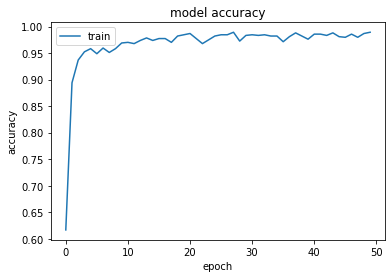

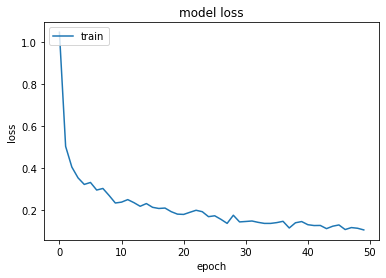

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[60  0  0  0  0  0]
 [ 0 60  0  0  0  0]
 [ 0  0 59  1  0  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0 60  0]
 [ 0  0  0  1  0 59]]
Epoch 1/50
53/53 [==============================] - 28s 200ms/step - loss: 1.4379 - accuracy: 0.4711
Epoch 2/50
53/53 [==============================] - 11s 204ms/step - loss: 0.5036 - accuracy: 0.8991
Epoch 3/50
53/53 [==============================] - 11s 207ms/step - loss: 0.3702 - accuracy: 0.9421
Epoch 4/50
53/53 [==============================] - 11s 206ms/step - loss: 0.3417 - accuracy: 0.9379
Epoch 5/50
53/53 [==============================] - 11s 203ms/step - loss: 0.2950 - accuracy: 0.9675
Epoch 6/50
53/53 [==============================] - 11s 201ms/step - loss: 0.2983 - accuracy: 0.9530
Epoch 7/50
53/53 [==============================] - 11s 201ms/step - loss: 0.2827 - accuracy: 0.9663
Epoch 8/50
53/53 [==============================] - 11s 201ms/step - loss: 0.2590 - accuracy: 0.9671
Epoch 9/50
53/53 [==============================] - 11s 202ms/ste

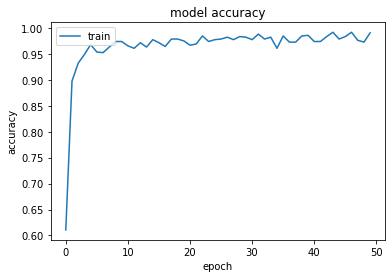

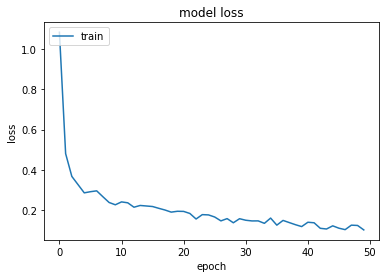

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[60  0  0  0  0  0]
 [ 0 60  0  0  0  0]
 [ 2  0 57  0  1  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0 60  0]
 [ 2  0  0  1  0 57]]
Epoch 1/50
53/53 [==============================] - 27s 201ms/step - loss: 1.4249 - accuracy: 0.4638
Epoch 2/50
53/53 [==============================] - 11s 204ms/step - loss: 0.6060 - accuracy: 0.8449
Epoch 3/50
53/53 [==============================] - 11s 207ms/step - loss: 0.4282 - accuracy: 0.9159
Epoch 4/50
53/53 [==============================] - 11s 205ms/step - loss: 0.3785 - accuracy: 0.9466
Epoch 5/50
53/53 [==============================] - 11s 203ms/step - loss: 0.3659 - accuracy: 0.9459
Epoch 6/50
53/53 [==============================] - 11s 201ms/step - loss: 0.3434 - accuracy: 0.9420
Epoch 7/50
53/53 [==============================] - 11s 201ms/step - loss: 0.3100 - accuracy: 0.9630
Epoch 8/50
53/53 [==============================] - 11s 201ms/step - loss: 0.3054 - accuracy: 0.9631
Epoch 9/50
53/53 [==============================] - 11s 201ms/ste

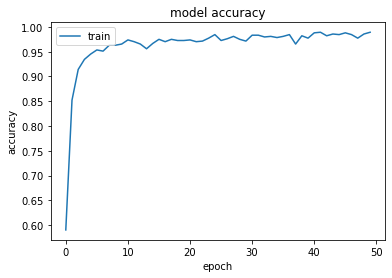

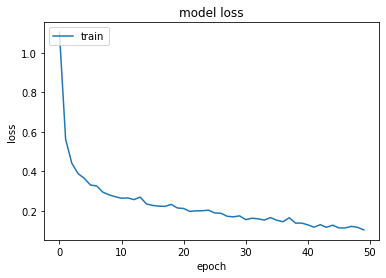

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[60  0  0  0  0  0]
 [ 0 60  0  0  0  0]
 [ 0  0 59  0  1  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0 60  0]
 [ 0  0  0  1  0 59]]
Epoch 1/50
53/53 [==============================] - 27s 200ms/step - loss: 1.3645 - accuracy: 0.5131
Epoch 2/50
53/53 [==============================] - 11s 204ms/step - loss: 0.5614 - accuracy: 0.8728
Epoch 3/50
53/53 [==============================] - 11s 207ms/step - loss: 0.4060 - accuracy: 0.9345
Epoch 4/50
53/53 [==============================] - 11s 205ms/step - loss: 0.3483 - accuracy: 0.9593
Epoch 5/50
53/53 [==============================] - 11s 203ms/step - loss: 0.3183 - accuracy: 0.9655
Epoch 6/50
53/53 [==============================] - 11s 201ms/step - loss: 0.3055 - accuracy: 0.9660
Epoch 7/50
53/53 [==============================] - 11s 201ms/step - loss: 0.2819 - accuracy: 0.9723
Epoch 8/50
53/53 [==============================] - 11s 201ms/step - loss: 0.2774 - accuracy: 0.9667
Epoch 9/50
53/53 [==============================] - 11s 201ms/ste

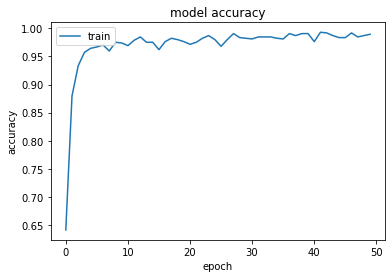

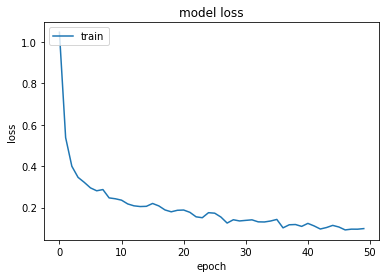

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[60  0  0  0  0  0]
 [ 0 60  0  0  0  0]
 [ 4  0 55  0  1  0]
 [ 0  0  0 60  0  0]
 [ 0  0  0  0 60  0]
 [ 0  0  0  0  0 60]]


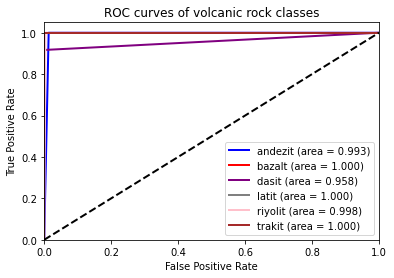

In [ ]:
#Training Process

EPOCHS=50
BATCH_SIZE=16
x_fold=10
#optimizer=Adadelta(lr=1.0, rho=0.95, epsilon=1e-07, decay=0.0)
#optimizer=Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
#optimizer=SGD(lr=0.001, momentum=0.0, nesterov=False)
optimizer=RMSprop(lr=0.0001, rho=0.9)

metric="accuracy" 
loss="categorical_crossentropy" 
model_checkpoint_callback=keras.callbacks.ModelCheckpoint("bestmodel.h5",save_best_only=True,save_weights_only=True,)
callbacks=[model_checkpoint_callback]

for i in range(x_fold):
  input_shape=(height, width, 3)
  Transfer_Model = DenseNet121(weights="imagenet", include_top=False, input_shape=input_shape)
  #Transfer_Model = ResNet50(weights="imagenet", include_top=False, input_shape=input_shape)
  
  add_model = Sequential()

  add_model.add(Flatten())
  add_model.add(BatchNormalization())
  add_model.add(Dense(16, activation='relu'))
  add_model.add(Dropout(0.25))
  add_model.add(BatchNormalization())
        
  add_model.add(Dense(class_number, activation='softmax'))
  #add_model.add(Tranfer_Model.output)

  model = Model(inputs=Transfer_Model.input, outputs=add_model(Transfer_Model.output))

  model.compile(loss=loss, optimizer=optimizer, metrics=[metric])
  history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
  #predictions
  y_pred= model.predict(X_test)
  y_pred=np.argmax(y_pred,axis=1).astype(np.float32)
  y_pred = keras.utils.to_categorical(y_pred, class_number)

  train_score = model.evaluate(X_train, y_train)
  test_score = model.evaluate(X_test, y_test)
  print(train_score)
  print(test_score)


  DenseNet121_RMSprop_history[i] = history.history
  #Plot accuracy 
  plt.close("all")
  plt.plot(history.history['accuracy'])
  #plt.plot(history.history['val_accuracy'])  
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  plt.savefig(os.path.join(save_path,"acc_"+str(i)+".jpg"),dpi=150)
  #Plot loss
  plt.close("all")
  plt.plot(history.history['loss'])
  #plt.plot(history.history['val_accuracy'])
      
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  plt.savefig(os.path.join(save_path,"loss_"+str(i)+".jpg"),dpi=150)
  #Plot ROC
  plot_roc(i)
  make_report(i)

  # 1h33m56s

In [ ]:
with open("../ychen/COMP551/mini4_data/classification_results/RMSprop/RMS_history.json", 'w') as RMS_f:
  json.dump(DenseNet121_RMSprop_history, RMS_f)

In [ ]:
print(history.history)

{'loss': [0.8161484599113464, 0.40890565514564514, 0.3851730227470398, 0.39774084091186523, 0.29868757724761963, 0.29982444643974304, 0.3146834373474121, 0.24420979619026184, 0.2197415828704834, 0.19271302223205566, 0.1318826973438263, 0.165227010846138, 0.19462883472442627, 0.13221591711044312, 0.09235238283872604, 0.15109434723854065, 0.10974889248609543, 0.11046555638313293, 0.13663093745708466, 0.1291305124759674, 0.07319213449954987, 0.11966513842344284, 0.10220800340175629, 0.09326223284006119, 0.07655171304941177, 0.07575196027755737, 0.09614375233650208, 0.0763339251279831, 0.06818098574876785, 0.08849132061004639, 0.10852225124835968, 0.08561212569475174, 0.12075603008270264, 0.06796076148748398, 0.09153131395578384, 0.06182985007762909, 0.0600447840988636, 0.07718400657176971, 0.0750836506485939, 0.08095131814479828, 0.08735201507806778, 0.11148687452077866, 0.04743938148021698, 0.06271358579397202, 0.07209435105323792, 0.07118159532546997, 0.08597951382398605, 0.057889360934

In [ ]:
len(history.history['loss'])

50

In [ ]:
print(test_score)

[0.33244049549102783, 0.8888888955116272]
